# Explorando la regresión lineal

Usaremos un conjunto de datos muy limpio con solo tres columnas (Gender/Sexo, Height/Altura y Weight/Peso) y sin valores nulos para practicar nuestras habilidades de regresión lineal.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# Lee el archivo csv
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/weight-height.csv')

# Imprime las primeras 5 filas del conjunto de datos
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
# Valores únicos de la columna Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

**Tracemos la distribución de la altura en hombres y mujeres.**

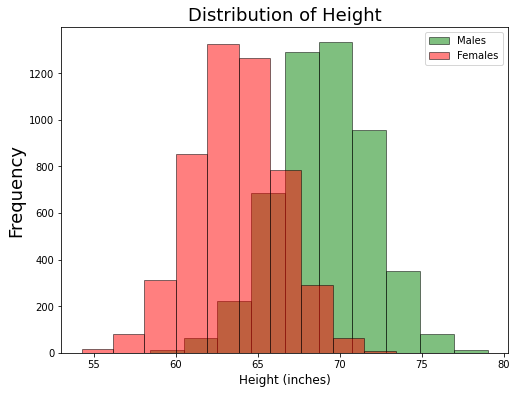

In [4]:
# Histograma de la altura - Hombres (Males) y Mujeres (Females) 

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(8,6))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Frequency', size=18);

**Tracemos la distribución del peso en machos y hembras.**

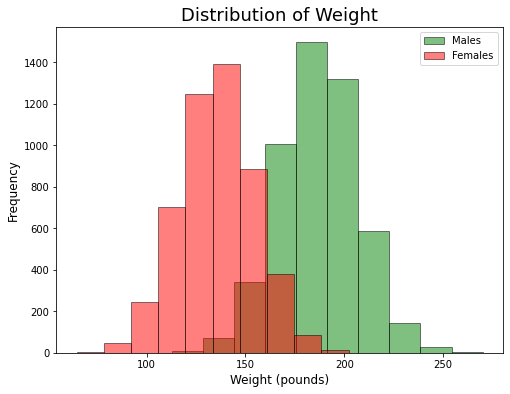

In [5]:
# Histograma del peso - hombres y mujeres

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='red', edgecolor='black', alpha=0.5, figsize=(8,6))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=18)
plt.xlabel('Weight (pounds)', size=12)
plt.ylabel('Frequency', size=12);

Observaciones: tanto **height** (altura) como **weight** (peso) presentan una distribución normal para hombres y mujeres. Aunque el promedio de ambas distribuciones es mayor para los hombres, la dispersión de las distribuciones es similar para ambos sexos.

¿Existe una relación entre la altura y el peso? ¿Qué diagrama puedo usar para confirmar esta relación? Los diagramas de dispersión muestran la relación entre dos características numéricas.

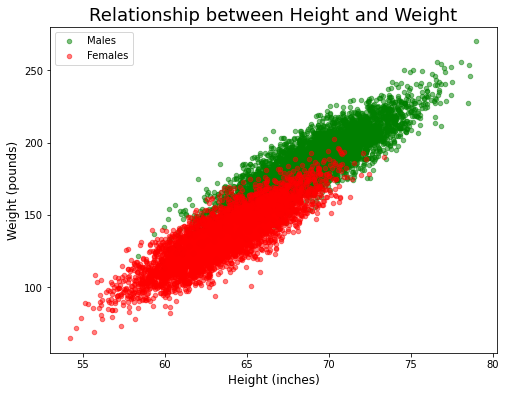

In [6]:
# Gráfico de dispersión de altura y peso

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='green', alpha=0.5, figsize=(8,6))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

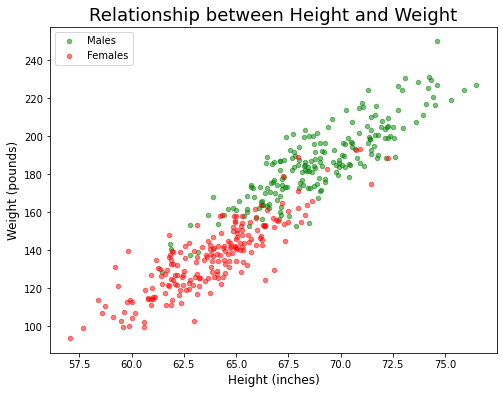

In [7]:
# Diagrama de dispersión de una muestra de Altura y Peso

ax1 = df[df['Gender'] == 'Male'].sample(200).plot(kind='scatter', x='Height', y='Weight', color='green', alpha=0.5, figsize=(8, 6))
df[df['Gender'] == 'Female'].sample(200).plot(kind='scatter', x='Height', y='Weight', color='red', alpha=0.5, figsize=(8,6), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

¿Notas la diferencia? Es porque en el primer gráfico, la gran cantidad de puntos de datos (5000 hombres y 5000 mijeres) dificultaba la visualización de puntos de datos individuales, por lo que decidimos tomar solo una muestra de 200 de cada uno.

Otra razón para tener visualizaciones difíciles en diagramas de dispersión es cuando una de las variables es una variable discreta (pequeña cantidad de valores únicos).

**¿Puedo usar la altura de una persona para predecir su peso?**

Usando Numpy:

La función Numpy polyfit numpy.polyfit(x,y,deg) ajusta un polinomio de grado deg a los puntos (x, y), devolviendo los coeficientes del polinomio que minimizan el error cuadrático. En las siguientes líneas de código, obtenemos los polinomios para predecir el peso de mujeres y hombres.

In [8]:
import numpy as np

# Polinomios de mejor ajuste

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']

# Polinomio - hombres
male_fit = np.polyfit(df_males.Height, df_males.Weight, 1)
print('Slope and intercept for males:',male_fit)

# Polinomio - mujeres
female_fit = np.polyfit(df_females.Height, df_females.Weight, 1)
print('Slope and intercept for females:',female_fit)

Slope and intercept for males: [   5.96177381 -224.49884071]
Slope and intercept for females: [   5.99404661 -246.01326575]


Using Scikit-learn:

In [9]:
from sklearn.linear_model import LinearRegression


#### Hombres

df_males = df[df['Gender'] == 'Male']

# Crear objeto de regresión lineal
lr_males = LinearRegression()

# Ajustar regresión lineal
lr_males.fit(df_males[['Height']], df_males['Weight'])

# Obtener la pendiente y la intersección de la línea que mejor se ajusten
print('Intercept for males:',lr_males.intercept_)
print('Slope for males:',lr_males.coef_)

#### Mujeres

df_females = df[df['Gender'] == 'Female']

# Crear objeto de regresión lineal
lr_females = LinearRegression()

# Ajustar regresión lineal
lr_females.fit(df_females[['Height']], df_females['Weight'])

# Obtener la pendiente y la intersección de la línea que mejor se ajusten
print('Intercept for females:', lr_females.intercept_)
print('Scope for females:',lr_females.coef_)

Intercept for males: -224.49884070545863
Slope for males: [5.96177381]
Intercept for females: -246.01326574667254
Scope for females: [5.99404661]


Usando Seaborn para la visualización:

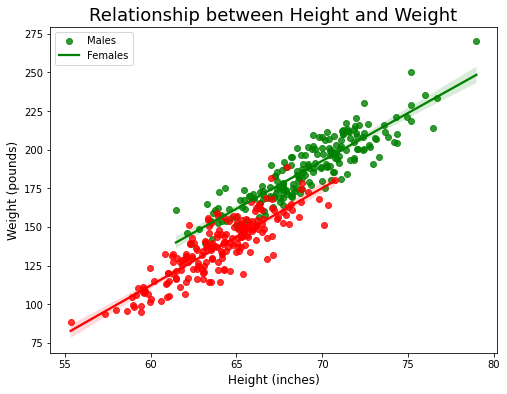

In [10]:
import seaborn as sns

# 200 muestras aleatorias
df_males_sample = df[df['Gender'] == 'Male'].sample(200)
df_females_sample = df[df['Gender'] == 'Female'].sample(200)

# Gráfica de regresión usando seaborn
fig = plt.figure(figsize=(8, 6))
sns.regplot(x=df_males_sample.Height, y=df_males_sample.Weight, color='green')
sns.regplot(x=df_females_sample.Height, y=df_females_sample.Weight, color='red')

# Leyenda, título y etiquetas
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

Observaciones: Ambos métodos calculan la recta que minimiza el error cuadrático. El error de mínimos cuadrados encuentra los valores óptimos de los parámetros minimizando la suma S de los errores al cuadrado.

Podemos hacer predicciones utilizando el método predict con scikit-learn y la función polyval con Numpy.

In [11]:
# Usando numpy para predecir el peso del individuo 61
print('With Numpy:', np.polyval(female_fit, [60]))

# Usando scikit aprende a predecir el peso del individuo 61
print('With Scikit-learn:',lr_females.predict([[60]]))

With Numpy: [113.62953114]
With Scikit-learn: [113.62953114]


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**¿Qué tan fuerte es la relación entre la altura y el peso en los hombres?**

In [12]:
# correlation coefficients 
print('Correlation between height and weight in males, using the .corr() method in a dataframe:')
df_males.corr()

Correlation between height and weight in males, using the .corr() method in a dataframe:


,Height,Weight
Height,1.000000,0.862979
Weight,0.862979,1.000000


In [13]:
from scipy import stats

# Coeficiente de correlación de Pearson y valor p
pearson_coef, p_value = stats.pearsonr(df_males.Height, df_males.Weight)

print('Correlation between height and weight in males, using Scipy:',pearson_coef)

Correlation between height and weight in males, using Scipy: 0.8629788486163177


Hasta ahora hemos utilizado el coeficiente de correlación de Pearson y diagramas de dispersión para ver si una regresión lineal sería apropiada para hacer predicciones.

Una forma diferente de evaluar esto es usando gráficos de residuos.

Los gráficos residuales muestran la diferencia entre los valores reales y los previstos. Si los puntos en una gráfica de residuos están dispersos aleatoriamente alrededor del eje horizontal, un modelo de regresión lineal es apropiado para los datos; de lo contrario, un modelo no lineal es más apropiado.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


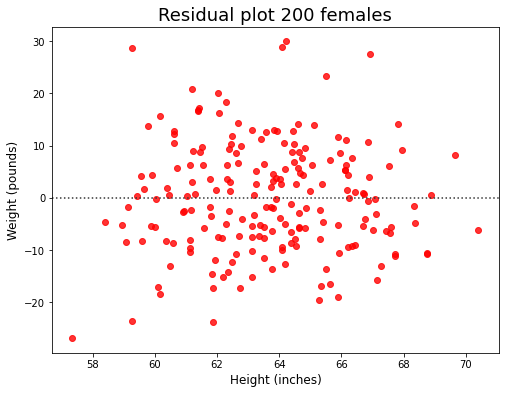

In [14]:
import seaborn as sns

# Marco de datos que contiene solo mujeres
df_females = df[df['Gender'] == 'Female'].sample(200)

# Residual plot 500 mujeres
fig = plt.figure(figsize = (8, 6))
sns.residplot(df_females.Height, df_females.Weight, color='red')

# Título y etiquetas
plt.title('Residual plot 200 females', size=18)
plt.xlabel('Height (inches)', size=12)
plt.ylabel('Weight (pounds)', size=12);

Los puntos se distribuyen aleatoriamente alrededor de 0, lo que significa que la regresión lineal es un modelo apropiado para hacer predicciones. 

**Uso de regresión múltiple para incluir más características**

In [15]:
# Primero necesitamos codificar nuestra característica categórica: Género
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [19]:
# Vrificar que todas las características sean numéricas
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [20]:
from sklearn.linear_model import LinearRegression

# Crear objeto de regresión lineal
mlr = LinearRegression()

# Ajustar regresión lineal
mlr.fit(df[['Height', 'Gender']], df['Weight'])

# Obtén la intersección y las pendientes de la línea que mejor se ajusten
print('Intercept:',mlr.intercept_)
print('Scopes:',mlr.coef_)

Intercept: -244.9235025206997
Scopes: [ 5.97694123 19.37771052]


Fuente: 

https://towardsdatascience.com/simple-and-multiple-linear-regression-with-python-c9ab422ec29c